In [1]:
# This script loads fraoms from girder, loads tracks from girder, 
# crops out a small image centered on the nuclei for 5 frames before and after the crossing.
# It has to deal with bad tracks.

from __future__ import division, print_function
from ipywidgets import interact, interactive, fixed, interact_manual    
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp
from scipy import ndimage
from IPython.core.debugger import set_trace
import cv2
import sys
from pprint import pprint
from random import randint
from nuclei.foci import *
import nuclei.girder as g
import nuclei.girder.time_lapse_data as reader

plt.rcParams['image.cmap'] = 'gist_earth'
matplotlib.rcParams['figure.figsize'] = (11.0, 11.0)




In [2]:

# Hard coded to folder ids
# TODO: Iterate over series in a folder.
# /Gwenda/LawDNADamageFociData
# 5aaf02831fbb9006233ae6a2  073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54
#    series000: 5aaf02871fbb9006233ae6a3
#    ...
# 5a95b8361fbb904fdd27d09a  080217 BT549 NLS GFP 53BP1 mcherry_2017_08_02__17_46_03
# 5aaec5d21fbb9006233ad700  080817 BT549 NLS GFP 53BP1 mcherry_2017_08_08__17_27_10

# this function is defined in foci.py
# 073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54/series000
# 92 time steps in this series (pattern "time%04d"%idx )
# three shannels are read into a single image (BGR)
# Looks like the brightfield channel is the first (0)
source = reader.time_lapse_data()
# 073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54series000
source.load('5aaf02831fbb9006233ae6a2')
num_series = source.get_number_of_series()

#parameters
series_idx = 11
before_time = 58
color =  (14, 175, 222)
row = 3
gap = 8





num_time_steps = source.get_series_length(series_idx)
series_folder = source.get_series_folder(series_idx)

after_time = before_time + 10
# load the image objects from girder for the two frames (before and after).
before_im, before_item_obj = source.get_image(series_idx, before_time)
after_im, after_item_obj = source.get_image(series_idx, after_time)

print("before %d %d %s"%(series_idx, before_time, before_item_obj['_id']))


# Load the tracks from girder from the two frames.
annotation = g.Annotation("tracks")
annotation.LoadFromItem(before_item_obj['_id'])
before_tracks = annotation.annot_obj['elements']
annotation.LoadFromItem(after_item_obj['_id'])
after_tracks = annotation.annot_obj['elements']

# convert the color to hex format.
hex_digits = "0123456789abcdef"
r1 = hex_digits[int(color[0]/16)]
r2 = hex_digits[color[0]%16]
g1 = hex_digits[int(color[1]/16)]
g2 = hex_digits[color[1]%16]
b1 = hex_digits[int(color[2]/16)]
b2 = hex_digits[color[2]%16]
hex_color = "#"+r1+r2+g1+g2+b1+b2
print(hex_color)


def find_track_by_color(tracks, hex_color):
    # shortest because mismerged tracks in after will be long
    best_track = None
    for e in tracks:
        if e['type'] == 'polyline' and e['lineColor'] == hex_color:
            if not best_track or len(best_track) < len(e['points']):
                best_track = e['points']
    return best_track

# find the track for this cell in the "before" frame.
before_track = find_track_by_color(before_tracks, hex_color)
after_track = find_track_by_color(after_tracks, hex_color)

print([t['lineColor'] for t in before_tracks])
print([t['lineColor'] for t in after_tracks])

print("%d, %d"%(len(before_track), len(after_track)))



before 11 58 5aaf078c1fbb9006233af3fd
#0eafde
['#b29d83', '#2dd63c', '#b23b3f', '#1c9fed', '#b34c23', '#9101ee', '#b68f09', '#302a02', '#f5aab9', '#de8e1d', '#777740', '#a6f286', '#7aa308', '#b47b5e', '#fb4439', '#ea2db6', '#05a51a', '#4a9648', '#e27520', '#f369fe', '#76c3a6', '#28fbc9', '#f529db', '#b1d2c0', '#823c55', '#b586e8', '#321efc', '#0d32e1', '#7fb939', '#dfaae9', '#bbddce', '#68dce2', '#c2e239', '#9a60dc', '#92f76f', '#749c4b', '#40b5e7', '#d217f2', '#c0049d', '#a6a76a', '#81c1b0', '#ee3e03', '#8f8ade', '#99f90e', '#8da0b2', '#976609', '#006ba1', '#cef87c', '#3f7a2e', '#1db5fa', '#cd2cc5', '#2ecc7b', '#46a437', '#8fee8b', '#93e847', '#35ba8c', '#d651f6', '#d075af', '#5299f9', '#1f2936', '#2ae185', '#0bda4f', '#38f49f', '#0b1d17', '#5c5cf4', '#4ae201', '#cc9786', '#388810', '#9b6f8a', '#a9cfb1', '#a779f1', '#c79946', '#104759', '#0eafde', '#7ae65e', '#a5020f']
['#8c67ee', '#b50b58', '#e12c44', '#6fa1c1', '#6c01b3', '#9971e9', '#143a10', '#cd0ec3', '#c3c26a', '#2d92e2', '#b29d

[(1212, 982, 49), (1186, 983, 50), (1189, 983, 51), (1138, 959, 52), (1121, 938, 53), (1125, 942, 54), (1122, 934, 55), (1123, 930, 56), (1116, 920, 57), (1118, 922, 58), (1093, 784, 59), (1103, 765, 60), (1107, 767, 61), (1114, 763, 62), (1124, 757, 63), (1126, 758, 64), (1129, 759, 65), (1125, 758, 66), (1129, 763, 67), (1139, 761, 68)]


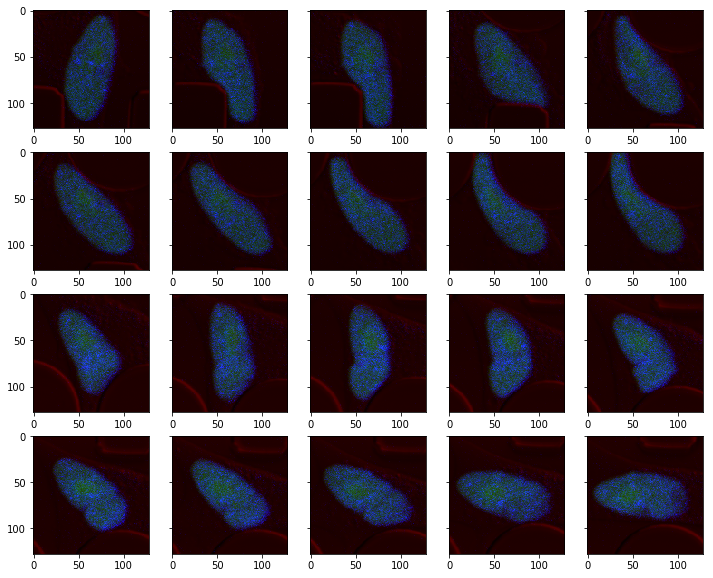

In [3]:
# Get the images for these cells.
# TODO: Put the time value in the z chanell.
# Assume the last track point is from the image time step.

# these will not be in the right order.

before_images = []
after_images = []
cross_track = []

for i in range(10):
    # Assume the last track point is from the image time step.
    pt_idx = len(after_track) - i - 1
    if pt_idx >= 0:
        x,y,z = after_track[pt_idx]
        z = after_time - i
        cross_track.append((x,y,z))
        im, item_obj = source.get_image(series_idx, z)
        im = im[y-64:y+64, x-64:x+64, ...]
        after_images.append(im)

for i in range(10):
    # Assume the last track point is from the image time step.
    pt_idx = len(before_track) - i - 1
    if pt_idx >= 0:
        x,y,z = before_track[pt_idx]
        z = before_time - i
        cross_track.append((x,y,z))
        im, item_obj = source.get_image(series_idx, before_time-i)
        im = im[y-64:y+64, x-64:x+64, ...]
        before_images.append(im)
        #print((x,y))

before_images.reverse()
after_images.reverse()
cross_track.reverse()
        
                
fig, ax = plt.subplots(4,5, sharey=True, figsize=(12,10))
# We need this coplexity because the arrays might not have 10 images.
# It still does not work, but it does not matter. These are for debugging.
count = 0
for x in range(2):
    for y in range(5):
        if count < len(before_images):
            ax[x][y].imshow(before_images[count], aspect="auto")
        count += 1

count = 0
for x in range(2,4):
    for y in range(5):
        if count < len(after_images):
            ax[x][y].imshow(after_images[count], aspect="auto")
        count += 1

print(cross_track)




In [4]:
g.upload_images(before_images + after_images, 'cross_%d_%d_%d'%(before_time, row, gap), series_folder['_id'])